# Summary

* Name: `dissipation-theory--Study-1.ipynb`
* Author: John A. Marohn
* Date: 2023-06-19
* Continued from: ---
* Continued to: `dissipation-theory--Study-2.ipynb`
* Summary: Explore Loring's recently revised theory for friction over metals.

# Preliminaries

In [1]:
import numpy as np
from dissipationtheory.constants import ureg, epsilon0
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
THIS = 'dissipation-theory--Study-1'

# Parameters

## Gold parameters

Put the parameters in a dictionary.

In [3]:
metal = {
    'v_F': ureg.Quantity(1.4e6, "m s^{-1}"),    # electron Fermi velocity
    'omega_p': ureg.Quantity(1.3e16, "s^{-1}"), # electron plasma oscillation frequency
    'nu': ureg.Quantity(7.1e13, "s^{-1}"),      # electron plasma oscillation decay rate
    'thickness': ureg.Quantity(100, "nm")       # sample thickness
}

Compute the electron mean free path.

In [4]:
(metal['v_F']/metal['nu']).to('nm')

19.718309859154928 <Unit('nanometer')>

## Cantilever parameters

Again, put the parameters in a dictionary.

In [5]:
cantilever = {
    'omega_c': 2*np.pi*ureg.Quantity(8000, "s^{-1}"), # cantilever frequency, 2*pi*8000/s = 50 kHz
    'q_c': ureg.Quantity(1.602e-19, "C")              # cantilever charge
}

# Explore the parameters

In [6]:
k = ureg.Quantity(np.logspace(start=-2, stop=2, num=20), "nm^{-1}")
k

Magnitude,[0.01 0.016237767391887217 0.026366508987303583 0.04281332398719394 0.06951927961775606 0.11288378916846889 0.18329807108324356 0.29763514416313175 0.4832930238571752 0.7847599703514611 1.2742749857031335 2.06913808111479 3.359818286283781 5.455594781168514 8.858667904100823 14.38449888287663 23.357214690901213 37.92690190732246 61.584821106602604 100.0]
Units,1/nanometer


We find that $\tilde{\omega} \ll 1$, in agreement with Loring's claim on the third paragraph of p 6311 of Loring 2022.

In [7]:
omega_bar = cantilever['omega_c']/(k * metal['v_F'])
omega_bar.to_base_units()

Magnitude,[3.5903916041026204e-09 2.2111362464130797e-09 1.3617243017767437e-09 8.386154752143414e-10 5.164598401830377e-10 3.180608686641697e-10 1.958772169769353e-10 1.2063063366383751e-10 7.429015994163549e-11 4.575146209986519e-11 2.817595608785709e-11 1.7352112151781695e-11 1.068626722689182e-11 6.581118554654838e-12 4.052970088697614e-12 2.496014378628538e-12 1.5371659898734652e-12 9.466609249751117e-13 5.829994371320321e-13 3.5903916041026205e-13]
Units,dimensionless


The other unitless parameters, $\tilde{\nu}$ and $\tilde{\omega}_{\mathrm{p}}$, do not satisfy this inequality.

In [8]:
nu_bar = metal['nu']/(k * metal['v_F'])
nu_bar.to_base_units()

Magnitude,[5.071428571428572 3.1232302132634198 1.923435739585641 1.1845444593242762 0.7294995862030291 0.449261015136542 0.2766765924735464 0.17039078451867756 0.10493485982796436 0.0646239457035161 0.03979854135353841 0.024509860495613888 0.015094353739701694 0.009295830747793077 0.005724820736400926 0.0035256206091862003 0.0021712471450648363 0.0013371586700703974 0.0008234867748742809 0.0005071428571428572]
Units,dimensionless


In [9]:
omega_p_bar = metal['omega_p']/(k * metal['v_F'])
omega_p_bar.to_base_units()

Magnitude,[928.5714285714287 571.8590531327388 352.1783748537089 216.88842212979708 133.57034676956872 82.25905910950767 50.65909439656483 31.198312658349415 19.213425038923052 11.83255343867196 7.2870568675492855 4.487720935816628 2.7637549100862255 1.7020535172015492 1.0482066137072117 0.6455361678791635 0.39755229416680105 0.24483186916781924 0.15077926863895283 0.09285714285714286]
Units,dimensionless


# Explore the functions

Create and plot the function $g(\nu)$, eq. 15 in Loring 2022.  Call this function `g_1`.

In [10]:
def g1(x):
    try:
        x = x.to_base_units()
    except:
        pass
    return 1 + x*(np.arctan(x) - np.pi/2)

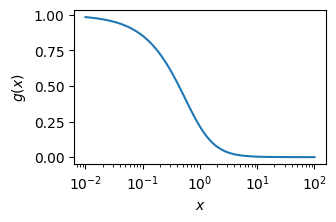

In [11]:
fig = plt.figure(figsize=(3.25, 2))
x = np.logspace(start=-2, stop=2, num=100)
plt.semilogx(x, g1(x))
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.show()

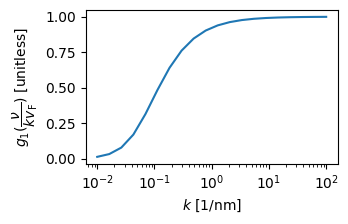

In [12]:
fig = plt.figure(figsize=(3.25, 2))
plt.semilogx(k.to('1/nm').magnitude, g1(nu_bar.to_base_units().magnitude))
plt.xlabel('$k$ [1/nm]')
plt.ylabel('$g_1(\\dfrac{\\nu}{k v_{\\mathrm{F}}})$ [unitless]')
plt.show()

Create and plot the function $f_{\mathrm{l}}^{\prime\prime}(\tilde{\omega} + i \tilde{\nu})$, equation 16 in Loring 2022.  Call this function `g2`.

In [13]:
def g2(x, y):
    try:
        x = x.to_base_units()
        y = y.to_base_units()
    except:
        pass
    return -1.0 * x * (y / (1 + y*y) + (np.arctan(y) - np.pi/2))

In [14]:
g2(omega_bar, nu_bar)

Magnitude,[1.752907046326447e-11 4.302374561387352e-11 9.554796060034925e-11 1.746054388370851e-10 2.398559085538929e-10 2.464159711353605e-10 2.044701630960567e-10 1.4915290108722789e-10 1.0121678640738099e-10 6.596935054569099e-11 4.201832925145723e-11 2.6406378803874817e-11 1.6463393703128147e-11 1.021524997147835e-11 6.31998648739659e-12 3.903130363952424e-12 2.407899577012305e-12 1.4844798349620066e-12 9.148131901521002e-13 5.636132261191311e-13]
Units,dimensionless


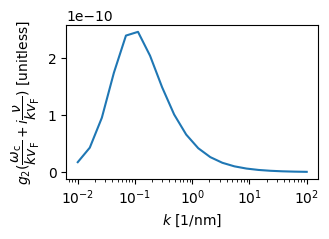

In [15]:
fig = plt.figure(figsize=(3.25, 2))
plt.semilogx(k.to('1/nm').magnitude, g2(omega_bar, nu_bar).magnitude)
plt.xlabel('$k$ [1/nm]')
plt.ylabel('$g_2(\\dfrac{\\omega_{\\mathrm{c}}}{k v_{\\mathrm{F}}}' 
           '+ i \\dfrac{\\nu}{k v_{\\mathrm{F}}})$ [unitless]')
plt.show()

Create and plot the dielectric function $\epsilon_{\mathrm{l}}(k, \omega)$, equation 7 in Loring 2022.  Call this function `\epsilon_Loring`

In [16]:
def epsilon_Loring(k, cantilever, metal):
    
    omega_bar = (cantilever['omega_c']/(k * metal['v_F'])).to_base_units()
    nu_bar = (metal['nu']/(k * metal['v_F'])).to_base_units()
    omega_p_bar = (metal['omega_p']/(k * metal['v_F'])).to_base_units()
    
    numerator = (omega_bar + 1j * nu_bar) * (g1(nu_bar) + 1j * g2(omega_bar, nu_bar))
    denominator = omega_bar + 1j * nu_bar * (g1(nu_bar) + 1j * g2(omega_bar, nu_bar))
    
    return 1 + 3 * np.power(omega_p_bar, 2.0) * numerator / denominator

For comparison, here is the Drude dielectric function disscussed in the first paragraph of page 6311 in Loring 2022.  Call this function `epsilon_Drude`.  This function does not depend on $k$.  However, if you feed it an array of $k$ values, the function will return an array of (repeated) values, convenient for plotting alongside `epsilon_Loring`.

In [17]:
def epsilon_Drude(k, cantilever, metal):
    
    omega_bar = (cantilever['omega_c']/(k * metal['v_F'])).to_base_units()
    nu_bar = (metal['nu']/(k * metal['v_F'])).to_base_units()
    omega_p_bar = (metal['omega_p']/(k * metal['v_F'])).to_base_units()
    
    denominator = omega_bar * (omega_bar + 1j * nu_bar)
    return 1 - np.power(omega_p_bar, 2.0) / denominator

Create an array of logarithmically-spaced wavevectors spanning a large range.

In [18]:
k_ = ureg.Quantity(np.logspace(start=-6, stop=3, num=500), "nm^{-1}")

Plot the real the imaginary parts of the two dielectric functions verus wavevector.  Observe that
* the real part of Loring's dielectric constant disagrees with the Drude model, in both sign an magnitude, while
* the imaginary part of Loring's dielectric function agrees with the Drude model in the $k \rightarrow 0$ limit.

/Users/jam99/Library/Caches/pypoetry/virtualenvs/dissipationtheory-Uvi85QQO-py3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


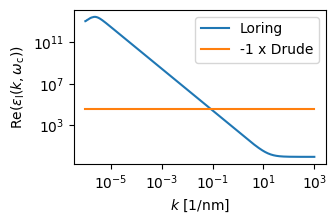

In [19]:
fig = plt.figure(figsize=(3.25, 2))
plt.loglog(k_.to('1/nm').magnitude, epsilon_Loring(k_, cantilever, metal).real, label='Loring')
plt.loglog(k_.to('1/nm').magnitude, -1*epsilon_Drude(k_, cantilever, metal).real, label='-1 x Drude')
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Re($\\epsilon_{\\mathrm{l}}(k , \\omega_{\\mathrm{c}})$)')
plt.legend()
plt.show()

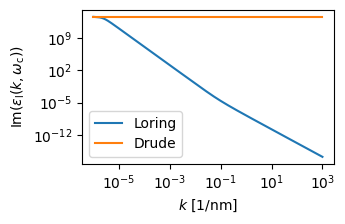

In [20]:
fig = plt.figure(figsize=(3.25, 2))
plt.loglog(k_.to('1/nm').magnitude, epsilon_Loring(k_, cantilever, metal).imag, label='Loring')
plt.loglog(k_.to('1/nm').magnitude, epsilon_Drude(k_, cantilever, metal).imag, label='Drude')
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Im($\\epsilon_{\\mathrm{l}}(k , \\omega_{\\mathrm{c}})$)')
plt.legend()
plt.show()

Now try to compute the sums $S_{\mathrm{e}}$ and $S_{\mathrm{o}}$, equations 4 and 5, respectively, in Loring 2022.  Start with $S_{\mathrm{e}}$.

In [21]:
prefactor = 2 / (k_ * metal['thickness']).to_base_units()
(prefactor.min(), prefactor.max())

(2e-05 <Unit('dimensionless')>, 20000.0 <Unit('dimensionless')>)

In [22]:
n_max = 500
n_array = np.arange(-n_max, n_max + 1)

In [23]:
k_2D, n_2D = np.meshgrid(k_.to_base_units().magnitude, n_array)
k_2D = k_2D * k.units
n_2D.shape

(1001, 500)

In [24]:
(k_2D.min(), k_2D.max())

(999.9999999999999 <Unit('1 / nanometer')>,
 999999999999.9999 <Unit('1 / nanometer')>)

In [25]:
(n_2D.min(), n_2D.max())

(-500, 500)

In [26]:
n_2D.sum(axis=0).shape

(500,)

In [27]:
numerator = (k_2D * k_2D).to_base_units().magnitude
(numerator.min(), numerator.max())

(9.999999999999996e+23, 9.999999999999996e+41)

In [28]:
k_perp = 2 * np.pi * n_2D / metal['thickness']
(k_perp .min(), k_perp.max())

(-31.415926535897928 <Unit('1 / nanometer')>,
 31.415926535897928 <Unit('1 / nanometer')>)

In [29]:
k_tot = np.sqrt(k_2D * k_2D + k_perp * k_perp)
(k_tot .min(), k_tot.max())

(999.9999999999999 <Unit('1 / nanometer')>,
 999999999999.9999 <Unit('1 / nanometer')>)

In [30]:
denominator = k_tot * k_tot * epsilon_Loring(k_tot, cantilever, metal)
(denominator.min(), denominator.max())

((1000258.6734693875+1.4589290093641956e-11j) <Unit('1 / nanometer ** 2')>,
 (9.999999999999997e+23+1.4577632408647142e-20j) <Unit('1 / nanometer ** 2')>)

In [31]:
reflSe = prefactor*(numerator/denominator).sum(axis=0)
reflSe[0].to_base_units()

(20008230.53071233-2.91686257626293e-10j) <Unit('meter ** 2')>

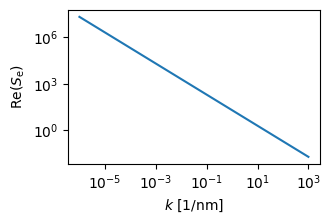

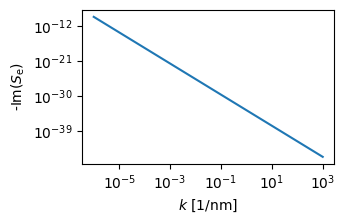

In [32]:
def plotcomplex(k_, y, ylabel):
    
    fig = plt.figure(figsize=(3.25, 2))
    plt.loglog(k_.to('1/nm').magnitude, y.to_base_units().magnitude.real)
    plt.xlabel('$k$ [1/nm]')
    plt.ylabel('Re(' + ylabel + ')')
    plt.show()

    fig = plt.figure(figsize=(3.25, 2))
    plt.loglog(k_.to('1/nm').magnitude, -y.to_base_units().magnitude.imag)
    plt.xlabel('$k$ [1/nm]')
    plt.ylabel('-Im(' + ylabel + ')')
    plt.show()
    
plotcomplex(k_, reflSe, '$S_{\\mathrm{e}}$')

Now create a proper function

In [33]:
def reflSe(k, cantilever, metal, nmax=500):
    
    prefactor = 2 / (k * metal['thickness'])
    n_array = np.arange(-n_max, n_max + 1)
    k_2D, n_2D = np.meshgrid(k.to('1/nm').magnitude, n_array)
    k_2D = k_2D * ureg.Quantity('1/nm')
    k_perp = np.pi * 2 * n_2D / metal['thickness']
    numerator = (k_2D * k_2D)
    k_tot = np.sqrt(k_2D * k_2D + k_perp * k_perp)
    denominator = k_tot * k_tot * epsilon_Loring(k_tot, cantilever, metal)
    return (prefactor*(numerator/denominator)).to('dimensionless').sum(axis=0)

In [34]:
reflSe(k_, cantilever, metal).max()

(0.44046514386664404-2.964976827169458e-13j) <Unit('dimensionless')>

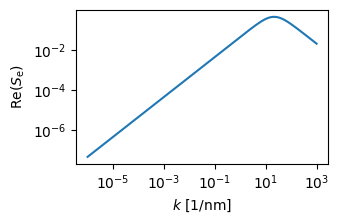

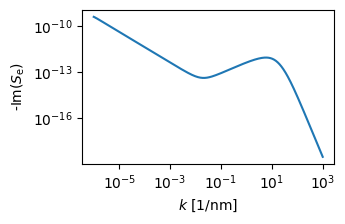

In [35]:
plotcomplex(k_, reflSe(k_, cantilever, metal), '$S_{\\mathrm{e}}$')

Now the other function

In [36]:
def reflSo(k, cantilever, metal, nmax=500):
    
    prefactor = 2 / (k * metal['thickness'])
    n_array = np.arange(-n_max, n_max + 1)
    k_2D, n_2D = np.meshgrid(k.to('1/nm').magnitude, n_array)
    k_2D = k_2D * ureg.Quantity('1/nm')
    k_perp = np.pi * (2 * n_2D + 1) / metal['thickness']
    numerator = (k_2D * k_2D)
    k_tot = np.sqrt(k_2D * k_2D + k_perp * k_perp)
    denominator = k_tot * k_tot * epsilon_Loring(k_tot, cantilever, metal)
    return (prefactor*(numerator/denominator)).to('dimensionless').sum(axis=0)

Check that the reflection coefficient parts are unitless.

In [37]:
reflSo(k_, cantilever, metal)[0]

(4.346330234415367e-08-1.74330738541293e-18j) <Unit('dimensionless')>

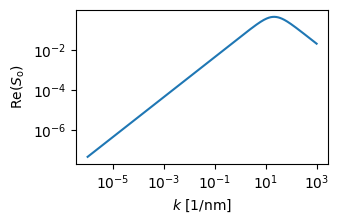

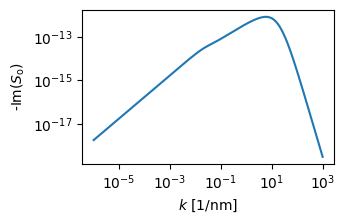

In [38]:
plotcomplex(k_, reflSo(k_, cantilever, metal), '$S_{\\mathrm{o}}$')

The reflection coefficient, plotted versus wavevector.

In [39]:
def rp(Se, So):
    return 0.5 * ( (1 - Se)/(1 + Se) + (1 - So)/(1 + So) )

In [40]:
(reflSe(k_, cantilever, metal).min(), reflSe(k_, cantilever, metal).max())

((4.346331503814914e-08-4.028582463584928e-10j) <Unit('dimensionless')>,
 (0.44046514386664404-2.964976827169458e-13j) <Unit('dimensionless')>)

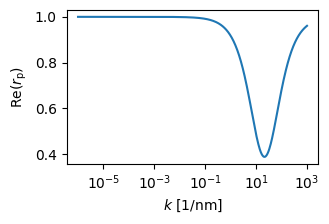

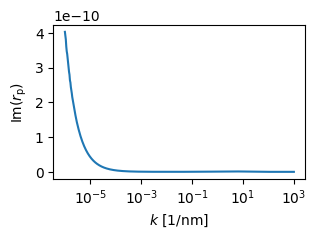

In [41]:
rp_data = rp(reflSe(k_, cantilever, metal), reflSo(k_, cantilever, metal))
             
fig = plt.figure(figsize=(3.25, 2))
plt.semilogx(k_.to('1/nm').magnitude, rp_data.real)
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Re($r_{\\mathrm{p}}$)')
plt.show()

fig = plt.figure(figsize=(3.25, 2))
plt.semilogx(k_.to('1/nm').magnitude, rp_data.imag)
plt.xlabel('$k$ [1/nm]')
plt.ylabel('Im($r_{\\mathrm{p}}$)')
plt.show()             

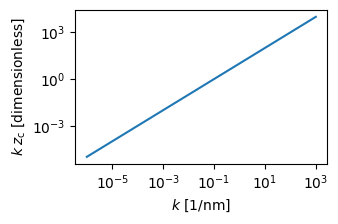

In [42]:
zc = ureg.Quantity(10, 'nm')
arg = (k_ * zc).to('dimensionless').magnitude

fig = plt.figure(figsize=(3.25, 2))
plt.loglog(k_.to('1/nm').magnitude, arg)
plt.xlabel('$k$ [1/nm]')
plt.ylabel('$k \: z_{\\mathrm{c}}$ [dimensionless]')
plt.show()

In [43]:
zc = ureg.Quantity(1, 'nm')
integrand = k_ * k_ * np.exp(-2 * k_ * zc) * rp_data

In [44]:
integrand[0]

(9.999979130755604e-13+4.0285740736707218e-22j) <Unit('1 / nanometer ** 2')>

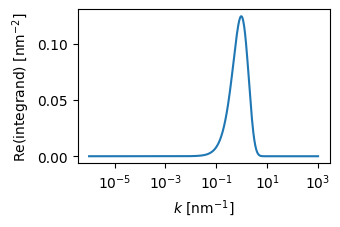

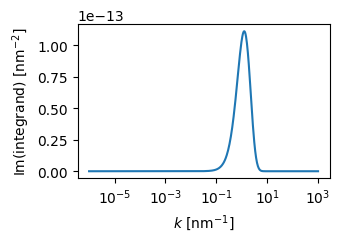

In [45]:
fig = plt.figure(figsize=(3.25, 2))
plt.semilogx(k_.to('1/nm').magnitude, integrand.to('1/nm^2').magnitude.real, '')
plt.xlabel('$k$ [nm$^{-1}$]')
plt.ylabel('Re(integrand) [nm$^{-2}$]')
plt.show()

fig = plt.figure(figsize=(3.25, 2))
plt.semilogx(k_.to('1/nm').magnitude, integrand.to('1/nm^2').magnitude.imag)
plt.xlabel('$k$ [nm$^{-1}$]')
plt.ylabel('Im(integrand) [nm$^{-2}$]')

plt.show()  

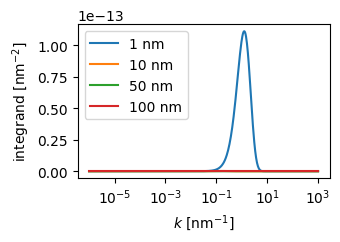

In [46]:
fig = plt.figure(figsize=(3.25, 2))
for height in [1, 10, 50, 100]:
    
    zc = ureg.Quantity(height, 'nm')
    integrand = k_ * k_ * np.exp(-2 * k_ * zc) * rp_data.imag
    plt.semilogx(k_.to('1/nm').magnitude, integrand.to('1/nm^2').magnitude, label='{:} nm'.format(height))
    
plt.xlabel('$k$ [nm$^{-1}$]')
plt.ylabel('integrand [nm$^{-2}$]')
plt.legend()
plt.show()

Check that the prefactor in the friction calculation, equation 2 in Loring 2022, has the proper units.

In [47]:
prefactor = (cantilever['q_c'] * cantilever['q_c'])/(8 * np.pi * epsilon0 * cantilever['omega_c'])
prefactor.to('kg nm^3/s')

2.294386499661828e-06 <Unit('kilogram * nanometer ** 3 / second')>

# Putting it all together

We want to use the `integrate.quad` function from `scipy` to carry out the integral.  The function does not know about units.  So write the integral in unitless form.

In [48]:
def rpintegrandu(k, z, cantilever, metal):
    
    Se = reflSe(k/z, cantilever, metal, nmax=500)
    So = reflSo(k/z, cantilever, metal, nmax=500)
    rp = 0.5 * ( (1 - Se)/(1 + Se) + (1 - So)/(1 + So) )
    integrand = k * k * np.exp(-2 * k) * rp.imag

    return integrand.to('dimensionless').magnitude

In [49]:
rpintegrandu(1e-3, ureg.Quantity(10, 'nm'), cantilever, metal)

array([4.21529254e-18])

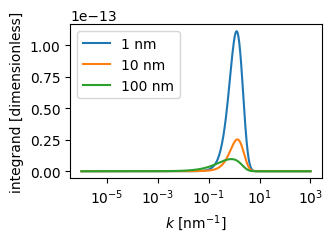

In [50]:
fig = plt.figure(figsize=(3.25, 2))
for height in [1, 10, 100]:
    
    z = ureg.Quantity(height, 'nm')
    plt.semilogx(k_.to('1/nm').magnitude, 
                 rpintegrandu(k_.to('1/nm').magnitude, z, cantilever, metal), 
                 label='{:} nm'.format(height))

plt.xlabel('$k$ [nm$^{-1}$]')
plt.ylabel('integrand [dimensionless]')
plt.legend()
plt.show()

As written, the integral depends weakly on distance.  Compute the integral for 10 and 100 nm separation.

In [51]:
integrate.quad(rpintegrandu, 0, np.inf, args=(ureg.Quantity(10, 'nm'), cantilever, metal, ))

(5.3899726749994336e-14, 3.556925415215364e-16)

In [52]:
integrate.quad(rpintegrandu, 0, np.inf, args=(ureg.Quantity(100, 'nm'), cantilever, metal, ))

(1.9926097443001148e-14, 1.6311847931665994e-17)

Print out the metal and cantilever parameters.

In [53]:
cantilever

{'omega_c': 50265.48245743669 <Unit('1 / second')>,
 'q_c': 1.602e-19 <Unit('coulomb')>}

In [54]:
metal

{'v_F': 1400000.0 <Unit('meter / second')>,
 'omega_p': 1.3e+16 <Unit('1 / second')>,
 'nu': 71000000000000.0 <Unit('1 / second')>,
 'thickness': 100 <Unit('nanometer')>}

Compute the dissipation for two difference sample thicknesses, 10 nm and 100 nm, at selected separations.

In [55]:
prefactor = (cantilever['q_c'] * cantilever['q_c'])/(8 * np.pi * epsilon0 * cantilever['omega_c'])   

for thickness in [10, 100]:

    metal['thickness'] = ureg.Quantity(thickness, "nm") 
    print("\nthickness = {:.0f} nm".format(thickness))
             
    for height in [5, 10, 50, 100]:

        z = ureg.Quantity(height, 'nm')
        
        (result, err) = integrate.quad(
            rpintegrandu, 
            0, np.inf, 
            args=(z, cantilever, metal, ))
        
        integral = np.power(z, -3) * result
        
        gamma = (prefactor * integral).to('kg/s').magnitude
        unit = (prefactor * integral).to('kg/s').units

        print("{:3d} nm {:0.4e} {:0.4e} {:}".format(height, result, gamma, unit))


thickness = 10 nm
  5 nm 8.6451e-14 1.5868e-21 kilogram / second
 10 nm 5.8316e-14 1.3380e-22 kilogram / second
 50 nm 6.4337e-14 1.1809e-24 kilogram / second
100 nm 1.1146e-13 2.5573e-25 kilogram / second

thickness = 100 nm
  5 nm 8.5986e-14 1.5783e-21 kilogram / second
 10 nm 5.3900e-14 1.2367e-22 kilogram / second
 50 nm 2.1696e-14 3.9824e-25 kilogram / second
100 nm 1.9926e-14 4.5718e-26 kilogram / second


Now create plots

In [56]:
def friction(height, metal, cantilever):

    gamma = np.zeros(len(height))
    prefactor = (cantilever['q_c'] * cantilever['q_c'])/(8 * np.pi * epsilon0 * cantilever['omega_c']) 
    for index, z in enumerate(height):
        
        (result, err) = integrate.quad(
            rpintegrandu, 
            0, np.inf, 
            args=(z, cantilever, metal, ))
        
        integral = np.power(z, -3) * result
        gamma[index] = (prefactor * integral).to('kg/s').magnitude
        
    return gamma * ureg.Quantity('kg/s')

This calculation takes a few minutes.

In [57]:
h = ureg.Quantity(np.linspace(5, 500, num=40), 'nm')

metal['thickness'] = ureg.Quantity(10, "nm") 
gamma1 = friction(h, metal, cantilever)

metal['thickness'] = ureg.Quantity(100, "nm") 
gamma2 = friction(h, metal, cantilever)

Plot the result nicely.

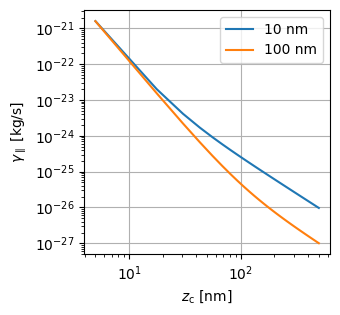

In [58]:
plt.figure(figsize=(3.5,3.25))
plt.loglog(h.to('nm').magnitude, gamma1.to('kg/s').magnitude, label='10 nm')
plt.loglog(h.to('nm').magnitude, gamma2.to('kg/s').magnitude, label='100 nm')
plt.legend()
plt.xlabel('$z_{\mathrm{c}}$ [nm]')
plt.ylabel('$\gamma_{\parallel}$ [kg/s]')
plt.grid()
plt.tight_layout()
plt.savefig(THIS + '--Fig1.png', dpi=300)
plt.savefig(THIS + '--Fig1.pdf')
plt.show()